In [13]:
import sys
sys.path.append('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/')
import utils
from importlib import reload
reload(utils)
from utils import *

In [14]:
df = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/complete_df.csv')

In [15]:
df.loc[:, 'target'] = df.target.round(1)

transform = {0.0: 0,
0.1: 1,
0.2: 2,
0.3: 3,
0.4: 4,
0.5: 5,
0.6: 6,
0.7: 7,
0.8: 8,
0.9: 9,
1.0: 10}

df.loc[:, 'target'] = df.target.map(transform)

In [16]:
random_state =  684         # the same as done in original sample_c
train_test_split_before_pca(df, 
                            output_folder='/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/', 
                            random_state=random_state,
                            impute=True)

---

In [17]:
X_train_val = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/X_train_val.csv')
X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/X_test.csv')

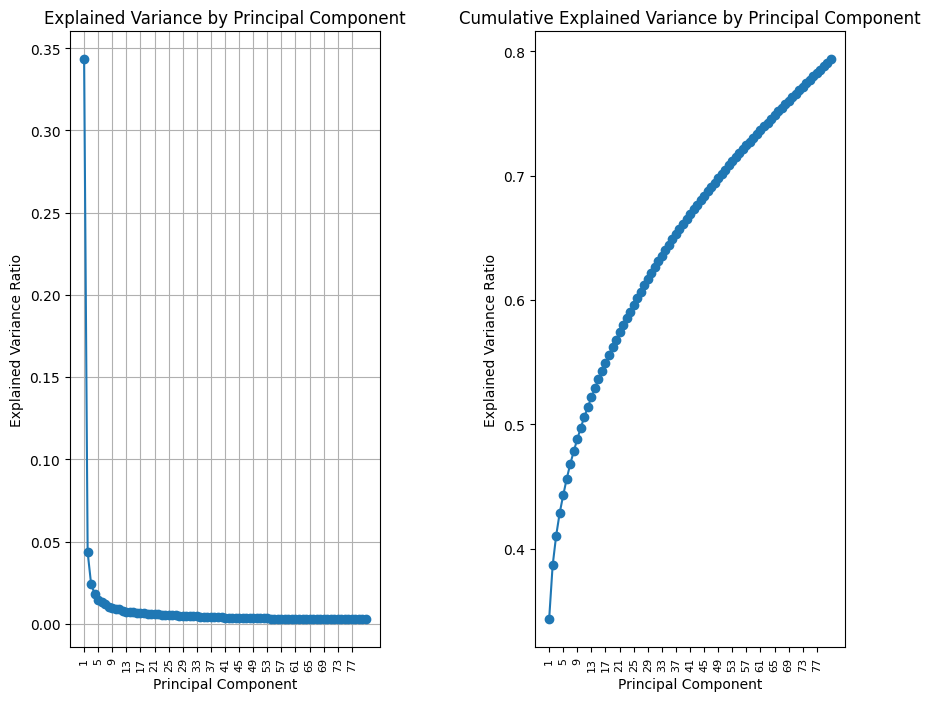

In [18]:
scaler, pca, pca_df = pca_with_results(X_train_val)

In [19]:
pc_to_select = 20 # as it was for the rfe output
selected_df = pca_df.loc[:, [f'PC{n}' for n in range(1, pc_to_select+1, 1)]]
print('Explained variance: ', np.sum(pca.explained_variance_ratio_[:26]))

Explained variance:  0.6016320976058908


In [20]:
import pickle 
with open('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/trained_models/pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

selected_df.to_csv('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/final_X_train_val.csv', index=False)

transform_test_after_pca_selection(X_test, scaler, pca, pc_to_select, output_folder='/nfs/home/genovese/thesis-wildfire-genovese/pca_study/database/sample_c/')

---